In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
import logging
logging.basicConfig(level=logging.ERROR)
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

!pip install sentence-transformers==0.2.6.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !cp -r "/content/drive/My Drive/research_lo_content_taxonomy_classification/model_euclidean_SENT_BERT_cos_attention_2_V2/" /content/

In [ ]:
!unzip /content/drive/My Drive/research_lo_content_taxonomy_classification/model_euclidean_SENT_BERT_cos_attention_2_V3.zip

unzip:  cannot find or open /content/drive/My, /content/drive/My.zip or /content/drive/My.ZIP.


In [ ]:
!pip install transformers==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install git+https://github.com/geoopt/geoopt.git
! pip install git+https://github.com/ferrine/hyrnn.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/geoopt/geoopt.git to /tmp/pip-req-build-ki0uasus
  Running command git clone -q https://github.com/geoopt/geoopt.git /tmp/pip-req-build-ki0uasus
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ferrine/hyrnn.git to /tmp/pip-req-build-d435y1yp
  Running command git clone -q https://github.com/ferrine/hyrnn.git /tmp/pip-req-build-d435y1yp


In [ ]:
import pandas as pd
train_data = pd.read_csv("train_taxonomy_prediction.csv")
val_data = pd.read_csv("validation_taxonomy_prediction.csv")
test_data = pd.read_csv("test_taxonomy_prediction.csv")

train_data


,board_syllabus,question_answer
0,social science>>geography : our environment>>w...,Identify the different processes involved in ...
1,social science>>history : our pasts - iii>>wea...,The word &#39;Chintz&#39; comes from which la...
2,social science>>civics : social and political ...,Which disease is responsible for the deaths o...
3,social science>>civics : social and political ...,Patients usually have to wait for hours in the...
4,science>>components of food,How can deficiency diseases be prevented? Def...
...,...,...
40890,science>>synthetic fibres and plastics,Name the monomer of polyester. Ester
40891,physics>>physics : part - ii>>ray optics and o...,"A convex lens and a concave lens, each having..."
40892,social science>>history : india and the contem...,Peasants who opposed collectivisation and res...
40893,"science>>garbage in, garbage out",Cancer is one of the fatal diseases causeddue...


In [ ]:
from google.colab import files

In [ ]:
!cp -r /content/drive/MyDrive/research_lo_content_taxonomy_classification/model_euclidean_SENT_BERT_cos_attention_2_V3 /content/

In [ ]:
import re
def clean_sentence(question):
  # print(question)
  question = re.sub('<[^>]*>', ' ',question)
  question = re.sub(' +', ' ', question)
  question = re.sub('\xa0','',question)
  question = question.rstrip()
  question = re.sub('nan','',question)
  question = re.sub(u'\u2004','',question)
  question = re.sub(u'\u2009','',question)

  # question = question.decode("utf-8")
  # question = question.replace(u'\u200\d*','').encode("utf-8")
  question = re.sub('&nbsp','',question)
  question = re.sub('&ndash','',question)
  question = re.sub('\r','',question)
  question = re.sub('\t','',question)
  question = re.sub('\n',' ',question)

  question = re.sub('MathType@.*','',question)
  question = re.sub('&thinsp','',question)
  question = re.sub('&times','',question)
  question = re.sub('\u200b','',question)
  question = re.sub('&rarr;;;','',question)

  return question

In [ ]:
# final_data_1 = final_data.loc[0:71003,:]
# final_data_1

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Loading BERT tokenizer...


In [ ]:
train_data["board_syllabus"].value_counts()

science                                                       493
science>>sound                                                364
science>>life processes                                       285
science>>acids, bases and salts                               281
computer science>>introduction to computer                    254
                                                             ... 
physics>>physics : part - ii>>atoms                            85
physics>>physics : part - ii>>oscillations                     83
physical science>>physical science (physics)>>force>>force     83
science>>light, shadows and reflections                        82
social science>>the mauryan empire>>the mauryan empire         82
Name: board_syllabus, Length: 312, dtype: int64

In [ ]:

# from sklearn.preprocessing import LabelEncoder

# LE = LabelEncoder()
# final_data['label'] = LE.fit_transform(final_data['board_syllabus'])
# final_data.head()

In [ ]:
# def get_labels(prediction):
#     predicted_label =  LE.inverse_transform([prediction])
#     return predicted_label[0]

In [ ]:
# get_labels(330)

In [ ]:
# train_data = pd.concat([train_data,val_data])
# train_data

In [ ]:
val_data

,board_syllabus,question_answer
0,science>>diversity in living organisms,Coelenterates shows two body forms.
1,"computer science[c++]>>linked lists, stacks an...",The following function is supposed to return ...
2,social science>>geography : the earth our habi...,The plains are known as food baskets. Why? Th...
3,science>>sound,The amount of sound energy passing each second...
4,science>>respiration in organisms,"When we breathe out, the concentration of wat..."
...,...,...
2148,physics>>physics : part - i>>units and measure...,(A)Add to correct significant figure? (B) Fin...
2149,science>>separation of substances,Explain the process of sieving. Sieving is us...
2150,social science>>history : our pasts - i>>build...,This is a cave painting . Answer the followin...
2151,"science>>acids, bases and salts","What are Acid, Base &amp; Salts? jjhkhjkhjkhj..."


In [ ]:
train_features = train_data["question_answer"]
test_features = test_data["question_answer"]
train_labels = train_data["board_syllabus"]
test_labels = test_data["board_syllabus"]
val_features = val_data["question_answer"]
val_labels = val_data["board_syllabus"]

In [ ]:
question_answer = train_features.values
categories = train_labels.values

In [ ]:
question_answer

array([' Identify the different processes involved in the &#39;water cycle&#39; from the options given below. i. Evaporation ii. Condensation iii. Sublimation iv. Precipitation i, ii and iv only',
       ' The word &#39;Chintz&#39; comes from which language? Hindi',
       ' Which disease is responsible for the deaths of 5 lakh people in India? Tuberculosis',
       ...,
       ' Peasants who opposed collectivisation and resisted the authorities were: deported and exiled',
       ' Cancer is one of the fatal diseases causeddue tothe harmful gases released during burning of plastic.',
       ' Fill in the blanks : (a) The process of transferring of charge from a charged object to the earth is called _____________. (b) The process of electric discharge can occur between two or more_______, or between ________ and the __________. (c) The uppermost layer of the earth called the _________. (a) E arthing (b) Clouds, clouds ,earth (c) C rust'],
      dtype=object)

In [ ]:
categories

array(['social science>>geography : our environment>>water',
       'social science>>history : our pasts - iii>>weavers, iron smelter & factory owners',
       'social science>>civics : social and political life - ii>>role of the government in health',
       ...,
       'social science>>history : india and the contemporary world - i>>socialism in europe and the russian revolution',
       'science>>garbage in, garbage out',
       'science>>some natural phenomena'], dtype=object)

In [ ]:
# val_features = test_features.values
# val_labels = test_labels.values

In [ ]:

import numpy as np
!pip install inflection

from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure
from bokeh.transform import linear_cmap
from bokeh.util.hex import hexbin
from bokeh.models import HoverTool
from bokeh import colors
import inflection

from nltk.stem import PorterStemmer 
ps = PorterStemmer()
from gzip import open as gopen
from pandas.core.common import flatten
import gensim.models.poincare as poincare
def get_cleaned_taxonomy(taxonomy):
  cleaned_taxonomy = []
  for value in taxonomy:
      value = ' '.join(value.split(">>"))
      # taxonomy_words = [inflection.singularize(val)  for token in value for val in token.split(" ") if val.isalpha()]
      cleaned_taxonomy.append( value )
  return cleaned_taxonomy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

# course_taxonomy

poincare_emb_data = get_cleaned_taxonomy(categories)
poincare_val = get_cleaned_taxonomy(val_labels)

In [ ]:
poincare_emb_data[2]

'social science civics : social and political life - ii role of the government in health'

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
wnl = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sentence_transformers import SentenceTransformer
sent_model = SentenceTransformer('bert-large-nli-stsb-mean-tokens')

In [ ]:
# taxonomy_vectors = []
taxonomy_vectors = sent_model.encode(poincare_emb_data)
# taxonomy_vectors = np.vstack(taxonomy_vectors)


In [ ]:
taxonomy_vectors = np.vstack(taxonomy_vectors)
taxonomy_vectors.shape

(40895, 1024)

In [ ]:
# taxonomy_vectors_val = []
# for feature in poincare_val:
taxonomy_vectors_val = sent_model.encode(poincare_val)
taxonomy_vectors_val = np.vstack(taxonomy_vectors_val)
taxonomy_vectors_val.shape

(2153, 1024)

In [ ]:
test_data

,board_syllabus,question_answer
0,physics>>physics : part - ii,(a) Describe a simple experiment (or activity...
1,social science>>geography : the earth our habi...,What is the average weather in a place over m...
2,science>>diversity in living organisms,Which of the following is correct for the cha...
3,physics>>physics : part - i>>physical world,The branch of Physics that deals with the mic...
4,social science>>history : our pasts - iii>>tri...,Why did tribals view traders as a major cause...
...,...,...
4779,political science>>political science : indian ...,Which one of the following is not true about ...
4780,science>>tissues,Which of the following is a fluid matrix of t...
4781,computer science[c++]>>programming methodology,Program formatting has more effect when a con...
4782,chemistry>>chemistry : part i>>solutions,Cryoscopic constant is related to depression i...


In [ ]:

train_data

,board_syllabus,question_answer
0,social science>>geography : our environment>>w...,Identify the different processes involved in ...
1,social science>>history : our pasts - iii>>wea...,The word &#39;Chintz&#39; comes from which la...
2,social science>>civics : social and political ...,Which disease is responsible for the deaths o...
3,social science>>civics : social and political ...,Patients usually have to wait for hours in the...
4,science>>components of food,How can deficiency diseases be prevented? Def...
...,...,...
40890,science>>synthetic fibres and plastics,Name the monomer of polyester. Ester
40891,physics>>physics : part - ii>>ray optics and o...,"A convex lens and a concave lens, each having..."
40892,social science>>history : india and the contem...,Peasants who opposed collectivisation and res...
40893,"science>>garbage in, garbage out",Cancer is one of the fatal diseases causeddue...


In [ ]:
set(train_data["question_answer"].values).intersection(set(test_data["question_answer"].values))

set()

In [ ]:
input_ids = []
attention_masks = []

for sent in question_answer:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', question_answer[0])
print('Token IDs:', input_ids[0])

Original:   Identify the different processes involved in the &#39;water cycle&#39; from the options given below. i. Evaporation ii. Condensation iii. Sublimation iv. Precipitation i, ii and iv only
Token IDs: tensor([  101,  6709,  1996,  2367,  6194,  2920,  1999,  1996,  1004,  1001,
         4464,  1025,  2300,  5402,  1004,  1001,  4464,  1025,  2013,  1996,
         7047,  2445,  2917,  1012,  1045,  1012,  9345, 17822,  3370,  2462,
         1012, 24707,  3619,  3370,  3523,  1012,  4942, 17960,  3370,  4921,
         1012, 13511,  1045,  1010,  2462,  1998,  4921,  2069,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           

In [ ]:
input_ids_val = []
attention_masks_val = []

for sent in val_features:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids_val.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_val.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids_val = torch.cat(input_ids_val, dim=0)
attention_masks_val = torch.cat(attention_masks_val, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', question_answer[0])
print('Token IDs:', input_ids[0])

Original:   Identify the different processes involved in the &#39;water cycle&#39; from the options given below. i. Evaporation ii. Condensation iii. Sublimation iv. Precipitation i, ii and iv only
Token IDs: tensor([  101,  6709,  1996,  2367,  6194,  2920,  1999,  1996,  1004,  1001,
         4464,  1025,  2300,  5402,  1004,  1001,  4464,  1025,  2013,  1996,
         7047,  2445,  2917,  1012,  1045,  1012,  9345, 17822,  3370,  2462,
         1012, 24707,  3619,  3370,  3523,  1012,  4942, 17960,  3370,  4921,
         1012, 13511,  1045,  1010,  2462,  1998,  4921,  2069,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           

In [ ]:
num_classes = len(list(set(categories)))
num_classes

312

In [ ]:
from torch.utils.data import TensorDataset, random_split
train_poincare_tensor = torch.tensor(taxonomy_vectors,dtype=torch.float)
val_poincare_tensor = torch.tensor(taxonomy_vectors_val,dtype=torch.float)

val_dataset = TensorDataset(input_ids_val,attention_masks_val,val_poincare_tensor)
# Combine the training inputs into a TensorDataset.
train_dataset = TensorDataset(input_ids, attention_masks, train_poincare_tensor)

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 32
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), 
            batch_size = batch_size 
        )

In [ ]:
# !pip install transformers==2.8.0
import transformers
print(transformers.__version__)

2.8.0


In [ ]:
train_poincare_tensor.shape

torch.Size([40895, 1024])

In [ ]:
set(question_answer).intersection(set(test_features))

set()

In [ ]:

import sys
import json
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from matplotlib import pyplot as plt
from torch.nn.modules.loss import HingeEmbeddingLoss
from random import randint

from tqdm import tqdm
import geoopt
import time
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from matplotlib import pyplot as plt
from torch.nn.modules.loss import HingeEmbeddingLoss
from random import randint
import torch.nn.functional as F

import time
import argparse
cos = nn.CosineSimilarity(dim=0, eps=1e-6)
cos_label = nn.CosineSimilarity(dim=1, eps=1e-5)

dist = torch.nn.PairwiseDistance(p=2.0, eps=1e-06)
nn.PairwiseDistance(p=2)
class MHSA(nn.Module):
  def __init__(self,
         emb_dim,
         kqv_dim,
         num_heads=2):
    super(MHSA, self).__init__()
    self.emb_dim = emb_dim
    self.kqv_dim = kqv_dim
    self.num_heads = num_heads

    self.w_k = nn.Linear(emb_dim, kqv_dim * num_heads, bias=False)
    self.w_q = nn.Linear(emb_dim, kqv_dim * num_heads, bias=False)
    self.w_v = nn.Linear(emb_dim, kqv_dim * num_heads, bias=False)
    self.w_out = nn.Linear(kqv_dim * num_heads, emb_dim)

  def forward(self, query, key, value):
    # print("query",query.shape)
    b, t = query.shape
    e = self.kqv_dim
    h = self.num_heads
    keys = self.w_k(key).view(b, h, e)
    values = self.w_v(value).view(b, h, e)
    queries = self.w_q(query).view(b, h, e)

    # keys = keys.transpose(2, 1)
    # queries = queries.transpose(2, 1)
    # values = values.transpose(2, 1)

    dot = queries @ keys.transpose(2, 1)  #(b*h*e) @ (b*e*h)
    dot = dot / np.sqrt(e)  # (b*h*h)
    dot = F.softmax(dot, dim=2)

    out = dot @ values   # (b*h*h) @ (b*h*e) = (b*h*e)
    out = out.contiguous().view(b, h * e)
    out = self.w_out(out)
    return out
# Neural Classifierwork

# Discussion TODOS
# try hierarhical interaction (TODO)

# try bringing in modalities (image, or video)

# Go from classical algorithm -> deep learning

class MulticlassClassifier(nn.Module):
    def __init__(self,bert_model_path):
        super(MulticlassClassifier,self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_path,output_hidden_states=True,output_attentions=False)
        self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(768, 1024)
        self.fc2 = nn.Linear(576, 1024)
        self.fc3 = nn.Linear(1024, 512)
        self.act = torch.nn.ReLU()
        self.fc4 = nn.Linear(512, 1024)

        self.multi_head_attention = MHSA(1024, 64,16)
        self.multihead_attn = torch.nn.MultiheadAttention(embed_dim = 1024,  num_heads = 4, batch_first=True)


    def forward(self,tokens,masks, targets=None, skip_attention=False):
        # print("tokens", tokens.shape)
        outputs = self.bert(tokens, attention_mask=masks)[2]
        # outputs[2] = outputs[2].permute(0,2,1)
        # print(outputs[-2].shape)
        output_1 = outputs[-1].permute(1,0,2)
        # print(outputs[1].shape,outputs[0].shape)
        output_1 = torch.mean(output_1, dim=0)
        # output_2 = outputs[-2].permute(1,0,2)
        # output_2 = torch.mean(output_2, dim=0)
        # print("output_2", output_2.shape, output_1.shape)
        pooled_output = outputs[-1] # output_1 # torch.cat((output_1, output_2), dim=1)
        # print("pooled_output", pooled_output.shape)
        x = self.fc1(pooled_output)
        # x = self.fc2(x)
        
        targets_curr_batch = []
        for index_1, input_x in enumerate(x):
            # print(input_x.shape, torch.mean(input_x,dim=0).shape)
            distance = cos_label(torch.mean(input_x,dim=0).reshape(1,-1), unique_poincare_tensor)
            distances,indices = torch.topk(distance,1,largest=True)

            target_distances = (F.normalize(unique_poincare_tensor[indices],p=2,dim=1) - F.normalize(unique_poincare_tensor,p=2,dim=1)).pow(2).sum(1) #cos_label(unique_poincare_tensor[indices].reshape(1,-1), unique_poincare_tensor)
            distances,indices = torch.topk(target_distances,5,largest=False)
            targets_curr_batch.append(unique_poincare_tensor[indices].reshape(1,5,1024))
            # print("here")
        # print(len(targets_curr_batch))
        targets_batch = torch.cat(targets_curr_batch, dim=0)
        # print("targets_batch",targets_batch.shape)
        # if not skip_attention:
          # print("here attention")
        attn_output, attn_output_weights = self.multihead_attn(targets_batch, x, x)
        # target_attn_output, attn_output_weights = self.multihead_attn(x, targets_batch, targets_batch)

        x = torch.sum(attn_output,dim=1)
        # target_final = torch.mean(target_attn_output, dim=1)
        # x = self.act(x)
        # x = self.fc4(x)
        # print("X shape",targets_batch.unsqueeze(dim=1).shape,x.shape,attn_output.shape)
        return x

class MyHingeLoss(torch.nn.Module):
    def __init__(self, margin):
        super(MyHingeLoss, self).__init__()
        self.margin = margin
    # def forward_val(self, output, target):
    #     cos = nn.CosineSimilarity(dim=0, eps=1e-6)
    #     loss = 0
    #     num_compare = 4
    #     count = 0
    #     for i in range(len(output)):
    #         v_image = output[i]
    #         t_label = target[i]
    #         for j in range(num_compare):
    #             if j != i:
    #                 count += 1
    #                 t_j = target[j]
    #                 loss += torch.relu( self.margin - cos(t_label, v_image) + cos(t_j, v_image) )
    #     return loss / count

    def forward(self, output, target):
        loss=0
        for i in range(len(output)):
            v_image = F.normalize(output[i],p=2,dim=0)
            t_label = F.normalize(target[i],p=2,dim=0)
            # j = randint(0, len(output)-1)
            # while j == i:
            #     j = randint(0, len(output)-1)
            distance = cos_label(t_label, target)
            # print(distance.shape)
            delta = min(len(target)-2,8)
            distances,indices = torch.topk(distance,len(target)-delta,largest=True)
            # print(indices)
            # index_target = random.choice(indices)
            # while index_target == i:
            #     # print("here***", index_target,i)
            #     index_target = random.choice(indices)
            count = 0
            for index_target in indices:
                if index_target!=i:
                    count=count+1
                    t_j = F.normalize(target[index_target],p=2,dim=0)
                    loss+= torch.relu( self.margin - cos(t_label, v_image) + cos(t_j, v_image) )
            # print("count",count)
        return loss / (len(output) * count)



In [ ]:
a= torch.tensor([[-0.4821,  1.059], [-0.4821,  1.059]])
a.shape

torch.Size([2, 2])

In [ ]:
from transformers import BertModel, AdamW, BertConfig
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


In [ ]:
from transformers import BertModel, AdamW, BertConfig

# Loads BertModel, the pretrained BERT model with a single 
model = MulticlassClassifier('bert-base-uncased')
model.load_state_dict(torch.load('model_euclidean_SENT_BERT_cos_attention_2_V3/model_weights'))

# Tell pytorch to run this model on the GPU.
model.cuda()


MulticlassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [ ]:
# mobius_params = []
# bert_params = []

# def mobius_params():
#   for param in model.named_parameters():
#     if 'fc' in param[0]:
#       yield param[1]
# def bert_params():
#   for param in model.named_parameters():
#     if 'bert' in param[0]:
#       yield param[1]


In [ ]:
optimizer_1 = torch.optim.AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )
# optimizer_2 = radam_.RiemannianAdam(mobius_params(), lr=0.01, stabilize=10)

In [ ]:
from transformers import get_linear_schedule_with_warmup


epochs = 30

# Total number of training steps is [number of batches] x [number of epochs]. 
total_steps = len(train_dataloader) * epochs



In [ ]:
len(train_dataloader) 

1278

In [ ]:
1935 * 32

61920

In [ ]:
scheduler = get_linear_schedule_with_warmup(optimizer_1, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:

# import numpy as np

# # Function to calculate the accuracy of our predictions vs labels
# def flat_accuracy(preds, labels):
#     pred_flat = np.argmax(preds, axis=1).flatten()
#     labels_flat = labels.flatten()
#     return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
criterion = MyHingeLoss(0.1)


In [ ]:

# course_taxonomy
train_labels = list(set(train_data["board_syllabus"].values))
emb_data_train = get_cleaned_taxonomy(train_labels)

In [ ]:
# taxonomy_vectors = []""
taxonomy_vectors = sent_model.encode(emb_data_train)
taxonomy_vectors = np.vstack(taxonomy_vectors)
taxonomy_vectors.shape

(312, 1024)

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
unique_poincare_tensor = torch.tensor(taxonomy_vectors,dtype=torch.float)


In [ ]:
unique_poincare_tensor = unique_poincare_tensor.to(device)

In [ ]:
import random
import numpy as np
import json
from sklearn.metrics import f1_score
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()
early_stopping = EarlyStopping(patience=6, verbose=True)

# For each epoch...
for epoch_i in range(0, epochs):
    


    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0


    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))


        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)


        model.zero_grad() 
        optimizer_1.zero_grad()       

        logits = model(b_input_ids, 
                             b_input_mask,b_labels)
        
        loss = criterion.forward(logits,b_labels)

  
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer_1.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_f1 = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        


        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        


          logits = model(b_input_ids, 
                              b_input_mask,b_labels)
          
        loss = criterion(logits,b_labels)

            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy().round()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        # total_eval_f1 += f1_score(label_ids,logits, average='macro')
        

    # Report the final accuracy for this validation run.
    # avg_val_accuracy = total_eval_f1 / len(validation_dataloader)
    # print("  f1score: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    early_stopping(avg_val_loss, model)
    if early_stopping.early_stop:
      print("Early stopping")
      break  
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))
    output_dir = 'model_euclidean_SENT_BERT_cos_attention_2_V3/'
    if early_stopping.counter==0:
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        print("Saving model to %s" % output_dir)
        tokenizer.save_pretrained(output_dir)
        torch.save(model.state_dict(), os.path.join(output_dir, 'model_weights'))

        !rm -rf "/content/drive/My Drive/research_lo_content_taxonomy_classification/model_euclidean_SENT_BERT_cos_attention_2_V3"
        !mv model_euclidean_SENT_BERT_cos_attention_2_V3 "/content/drive/My Drive/research_lo_content_taxonomy_classification/"
    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")



print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 30 ========
Training...
  Batch    40  of  1,278.    Elapsed: 0:00:58.
  Batch    80  of  1,278.    Elapsed: 0:01:56.
  Batch   120  of  1,278.    Elapsed: 0:02:55.
  Batch   160  of  1,278.    Elapsed: 0:03:53.
  Batch   200  of  1,278.    Elapsed: 0:04:51.
  Batch   240  of  1,278.    Elapsed: 0:05:50.
  Batch   280  of  1,278.    Elapsed: 0:06:48.
  Batch   320  of  1,278.    Elapsed: 0:07:46.
  Batch   360  of  1,278.    Elapsed: 0:08:45.
  Batch   400  of  1,278.    Elapsed: 0:09:43.
  Batch   440  of  1,278.    Elapsed: 0:10:41.
  Batch   480  of  1,278.    Elapsed: 0:11:40.
  Batch   520  of  1,278.    Elapsed: 0:12:38.
  Batch   560  of  1,278.    Elapsed: 0:13:36.
  Batch   600  of  1,278.    Elapsed: 0:14:35.
  Batch   640  of  1,278.    Elapsed: 0:15:33.
  Batch   680  of  1,278.    Elapsed: 0:16:31.
  Batch   720  of  1,278.    Elapsed: 0:17:30.
  Batch   760  of  1,278.    Elapsed: 0:18:28.
  Batch   800  of  1,278.    Elapsed: 0:19:26.
  Batch   840  o

In [ ]:
for i in range(1000000000000000000000000000000000000000000):
    j=i

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

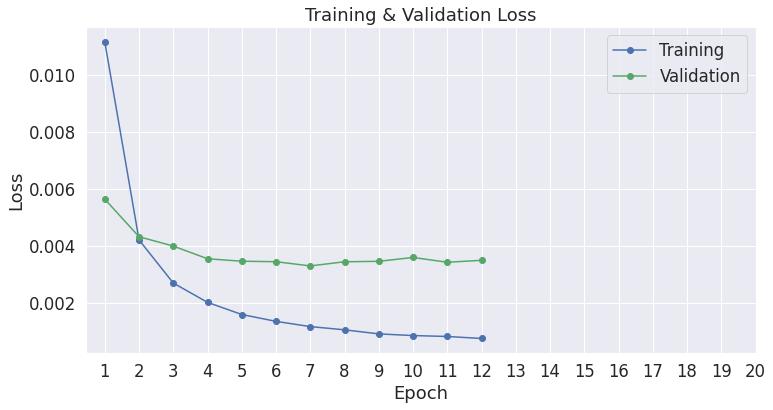

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.show()

In [ ]:
import os


output_dir = 'model_euclidean_SENT_BERT_cos_attention_2_V3/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)


# model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
# model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

Saving model to model_euclidean_SENT_BERT_cos_attention_2_V3/


('model_euclidean_SENT_BERT_cos_attention_2_V3/vocab.txt',
 'model_euclidean_SENT_BERT_cos_attention_2_V3/special_tokens_map.json',
 'model_euclidean_SENT_BERT_cos_attention_2_V3/added_tokens.json')

In [ ]:
# !pip install joblib
# import joblib
# joblib.dump(LE, "label_encoder")


In [ ]:
import json
torch.save(model.state_dict(), os.path.join(output_dir, 'model_weights'))


In [ ]:
# with open(os.path.join(output_dir, 'model_config.json'), 'w') as f:
#     json.dump(model.config, f)

In [ ]:
!zip -r model_euclidean_SENT_BERT_cos_attention_2_V3.zip model_euclidean_SENT_BERT_cos_attention_2_V3
# files.download('model_euclidean_1.zip')

updating: model_euclidean_SENT_BERT_cos_attention_2_V3/ (stored 0%)
updating: model_euclidean_SENT_BERT_cos_attention_2_V3/tokenizer_config.json (stored 0%)
updating: model_euclidean_SENT_BERT_cos_attention_2_V3/vocab.txt (deflated 53%)
updating: model_euclidean_SENT_BERT_cos_attention_2_V3/special_tokens_map.json (deflated 40%)
updating: model_euclidean_SENT_BERT_cos_attention_2_V3/model_weights (deflated 8%)


In [ ]:
# !zip -r label_encoder_categorized_reduced.zip label_encoder
# files.download('label_encoder_categorized_reduced.zip')

In [ ]:
test_features = test_features.values
labels = test_labels.values

# Lo classification

In [ ]:
# Run this cell and next if you want to test on LO zero shot setting If you want to test on ARC skip them.
import pandas as pd
lo_data = pd.read_csv("what_you_learnt_lo_labelled.csv", delimiter="|")

In [ ]:
test_features = lo_data["learning_objectives"].values
labels = lo_data["taxonomy"].values

In [ ]:
def get_cleaned_taxonomy_lo(taxonomy):
  cleaned_taxonomy = []
  for value in taxonomy:
      value = ' '.join(value.lower().split(">>"))
      # taxonomy_words = [inflection.singularize(val)  for token in value for val in token.split(" ") if val.isalpha()]
      cleaned_taxonomy.append( value )
  return cleaned_taxonomy

In [ ]:
#when testing for Lo data
test_labels = list(set(lo_data["taxonomy"].values))
emb_data_test = get_cleaned_taxonomy_lo(test_labels)

In [ ]:
test_features

array(['A complete chemical equation represents the reactants products and their physical states symbolically.',
       'A chemical equation is balanced so that the numbers of atoms of each type involved in a chemical reaction are the same on the reactant and product sides of theequation. Equations must always be balanced.',
       'In a combination reaction two or more substances combine to form a new singlesubstance.',
       'Decomposition reactions are opposite to combination reactions. In a decomposition reaction a single substance decomposes to give two or more substances.',
       'Reactions in which heat is given out along with the products are called exothermic reactions.',
       'Reactions in which energy is absorbed are known as endothermic reactions.',
       'When an element displaces another element from its compound a displacement reaction occurs.',
       'Precipitation reactions produce insoluble salts.',
       'Two different atoms or groups of atoms (ions) are excha

In [ ]:
labels

array(['physics>>physics : part - ii',
       'social science>>geography : the earth our habitat>>india : climate, vegetation and wildlife',
       'science>>diversity in living organisms', ...,
       'computer science[c++]>>programming methodology',
       'chemistry>>chemistry : part i>>solutions',
       'science>>periodic classification of elements'], dtype=object)

In [ ]:
len(list(set(labels)))

48

In [ ]:
len(list(set(train_data["board_syllabus"].values)))

312

In [ ]:

# course_taxonomy
test_labels = list(set(test_data["board_syllabus"].values))
emb_data_test = get_cleaned_taxonomy(test_labels)

In [ ]:
test_data_labels = test_data["board_syllabus"].values
taxonomy_labels = get_cleaned_taxonomy(test_data_labels)
taxonomy_label_vectors = sent_model.encode(taxonomy_labels)
taxonomy_label_vectors = np.vstack(taxonomy_label_vectors)
taxonomy_label_vectors.shape

(4784, 1024)

In [ ]:
from sentence_transformers import SentenceTransformer
sent_model = SentenceTransformer('bert-large-nli-stsb-mean-tokens')

In [ ]:
# taxonomy_vectors = []""
taxonomy_label_vectors = sent_model.encode(emb_data_test)
taxonomy_label_vectors = np.vstack(taxonomy_label_vectors)
taxonomy_label_vectors.shape

(312, 1024)

In [ ]:
model = MulticlassClassifier('bert-base-uncased')
model.load_state_dict(torch.load('/content/drive/MyDrive/research_lo_content_taxonomy_classification/model_euclidean_SENT_BERT_cos_attention_2_V3/model_weights'))
model.cuda()

MulticlassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [ ]:
test_input_ids = []
test_attention_masks = []
for sent in test_features:

    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    test_input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    test_attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
test_input_ids = torch.cat(test_input_ids, dim=0)
test_attention_masks = torch.cat(test_attention_masks, dim=0)
# labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  
test_poincare_tensor = torch.tensor(taxonomy_vectors,dtype=torch.float)

# Create the DataLoader.
# prediction_data = TensorDataset(test_input_ids, test_attention_masks, test_poincare_tensor)
# prediction_sampler = SequentialSampler(prediction_data)
# prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
taxonomy_label_vectors.shape

(312, 1024)

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
test_poincare_tensor = torch.tensor(taxonomy_label_vectors,dtype=torch.float)


In [ ]:
len(labels)

4784

In [ ]:
test_labels = np.array(test_labels)

In [ ]:
test_labels.shape

(312,)

In [ ]:
test_poincare_tensor.shape

torch.Size([312, 1024])

In [ ]:
!zip -r model_euclidean_SENT_BERT_cos_attention_2_V3.zip model_euclidean_SENT_BERT_cos_attention_2_V3

  adding: model_euclidean_SENT_BERT_cos_attention_2_V3/ (stored 0%)
  adding: model_euclidean_SENT_BERT_cos_attention_2_V3/vocab.txt (deflated 53%)
  adding: model_euclidean_SENT_BERT_cos_attention_2_V3/special_tokens_map.json (deflated 40%)
  adding: model_euclidean_SENT_BERT_cos_attention_2_V3/tokenizer_config.json (stored 0%)
  adding: model_euclidean_SENT_BERT_cos_attention_2_V3/model_weights (deflated 8%)


In [ ]:

print('Predicting labels for {:,} test sentences...'.format(len(test_input_ids)))

# Put model in evaluation mode
model.eval()
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)

input_ids = test_input_ids.to('cuda')
attention_masks = test_attention_masks.to('cuda')
test_poincare_tensor = test_poincare_tensor.to('cuda')
taxonomy_label_vectors = torch.tensor(taxonomy_label_vectors).to('cuda')
# Tracking variables 
predictions , true_labels = [], []

for index, (input_id,attention_mask) in enumerate(zip(input_ids, attention_masks)):
  # print("index",index)
  with torch.no_grad():
    max_cos_sim =0
    outputs = model(input_id.reshape(1,-1),attention_mask.reshape(1,-1),  skip_attention=False)
    # for target_tensor in test_poincare_tensor:
    #   output_interim = model(input_id.reshape(1,-1),attention_mask.reshape(1,-1), target_tensor.reshape(1,-1) , skip_attention=False)
    #   similarity = cos(output_interim,target_tensor)
    #   if similarity > max_cos_sim:
    #     max_cos_sim = similarity
    #     outputs = output_interim
      # distances = (F.normalize(outputs,p=2,dim=1) - F.normalize(test_poincare_tensor,p=2,dim=1)).pow(2).sum(1)
    # distances,indices = torch.topk(distances,1,largest=False)
    # # print("test_poincare_tensor[indices]",indices, test_poincare_tensor[indices].shape)
    # # for test_tensor in test_poincare_tensor[indices]:
    # outputs = model(input_id.reshape(1,-1),attention_mask.reshape(1,-1), test_poincare_tensor[indices] , skip_attention=False)
    
  distances = cos(outputs,test_poincare_tensor)#torch.topk(cos(outputs,test_poincare_tensor),20,largest=True)
  distances,indices = torch.topk(distances,2,largest=True)
  predictions.append(test_labels[indices.cpu().numpy()])
#   print("outputs",predictions[-1][0])

print(len(predictions))

Predicting labels for 417 test sentences...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()


417


In [ ]:
test_data

,board_syllabus,question_answer
0,physics>>physics : part - ii,(a) Describe a simple experiment (or activity...
1,social science>>geography : the earth our habi...,What is the average weather in a place over m...
2,science>>diversity in living organisms,Which of the following is correct for the cha...
3,physics>>physics : part - i>>physical world,The branch of Physics that deals with the mic...
4,social science>>history : our pasts - iii>>tri...,Why did tribals view traders as a major cause...
...,...,...
4779,political science>>political science : indian ...,Which one of the following is not true about ...
4780,science>>tissues,Which of the following is a fluid matrix of t...
4781,computer science[c++]>>programming methodology,Program formatting has more effect when a con...
4782,chemistry>>chemistry : part i>>solutions,Cryoscopic constant is related to depression i...


In [ ]:
train_labels = np.array(train_labels)

In [ ]:

print('Predicting labels for {:,} test sentences...'.format(len(test_input_ids)))

# Put model in evaluation mode
model.eval()
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)


input_ids = test_input_ids.to('cuda')
attention_masks = test_attention_masks.to('cuda')
test_poincare_tensor = test_poincare_tensor.to('cuda')
# taxonomy_label_vectors = torch.tensor(taxonomy_label_vectors).to('cuda')
# Tracking variables 
predictions , true_labels = [], []

for index, (input_id,attention_mask) in enumerate(zip(input_ids, attention_masks)):
  # print("index",index)
  with torch.no_grad():
    outputs = model(input_id.reshape(1,-1),attention_mask.reshape(1,-1),skip_attention=False)
    
  distances = cos(outputs,test_poincare_tensor)#torch.topk(cos(outputs,test_poincare_tensor),20,largest=True)
  distances,indices = torch.topk(distances,3,largest=True)
  predictions.append(test_labels[indices.cpu().numpy()])
#   print("outputs",predictions[-1][0])

print(len(predictions))

Predicting labels for 4,784 test sentences...
4784


In [ ]:
len(train_labels)

312

In [ ]:
input1 = torch.randn(2, 128)
input2 = torch.randn(1, 128)
cos = nn.CosineSimilarity(dim=1, eps=1e-6)
output = cos(input1, input2)
output, input1.shape, input2.shape

(tensor([ 0.0828, -0.0705]), torch.Size([2, 128]), torch.Size([1, 128]))

In [ ]:
if output <0:
  print("here")

In [ ]:
labels

array([ 66, 237, 116, ...,  49,   8, 152])

In [ ]:
predictions[0]

array(['science', 'physics>>physics : part - ii',
       'chemistry>>chemistry : part i>>states of matter',
       'science>>motion', 'science>>components of food'], dtype='<U116')

In [ ]:
!pip install tensorflow==1.13.1
! pip install tensorflow-hub==0.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 92.6 MB 104 kB/s 
     |████████████████████████████████| 3.2 MB 46.6 MB/s 
     |████████████████████████████████| 50 kB 8.8 MB/s 
     |████████████████████████████████| 367 kB 56.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
    Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220719082949
ERROR: pip's dependency resolver does not currently ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 89 kB 3.6 MB/s 
  Attempting uninstall: tensorflow-hub
    Found existing installation: tensorflow-hub 0.12.0
    Uninstalling tensorflow-hub-0.12.0:
      Successfully uninstalled tensorflow-hub-0.12.0


In [ ]:
labels=test_data['board_syllabus'].values

In [ ]:
from sklearn .preprocessing import LabelEncoder
LE= LabelEncoder()
labels = LE.fit_transform(labels)
labels

array([ 66, 237, 116, ...,  49,   8, 152])

In [ ]:
labels

array([ 66, 237, 116, ...,  49,   8, 152])

In [ ]:
final_predictions = []
for prediction in predictions:
  final_predictions.append(LE.transform(prediction))


In [ ]:
len(final_predictions[-1])

1

In [ ]:
test_data

,board_syllabus,question_answer
0,physics>>physics : part - ii,(a) Describe a simple experiment (or activity...
1,social science>>geography : the earth our habi...,What is the average weather in a place over m...
2,science>>diversity in living organisms,Which of the following is correct for the cha...
3,physics>>physics : part - i>>physical world,The branch of Physics that deals with the mic...
4,social science>>history : our pasts - iii>>tri...,Why did tribals view traders as a major cause...
...,...,...
4779,political science>>political science : indian ...,Which one of the following is not true about ...
4780,science>>tissues,Which of the following is a fluid matrix of t...
4781,computer science[c++]>>programming methodology,Program formatting has more effect when a con...
4782,chemistry>>chemistry : part i>>solutions,Cryoscopic constant is related to depression i...


In [ ]:
predictions[-4]

array(['science>>tissues'], dtype='<U116')

In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 20
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, k=3)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, k=3)

tmp_rank = tf.nn.top_k(y_pred, 3)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    # print("precision",sess.run(update_precision))
    # print("precision",s|ess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 3) (4784,)
update_recall:  0.8536789297658863
recall 0.8536789297658863
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 4084.0, 700.0, 0.0, 0.0]
TMP_RANK:  TopKV2(values=array([[100,  66,   0],
       [243, 237, 222],
       [287, 162, 116],
       ...,
       [ 49,  42,  35],
       [ 15,   8,   6],
       [204, 203, 152]]), indices=array([[1, 0, 2],
       [0, 1, 2],
       [2, 0, 1],
       ...,
       [0, 2, 1],
       [1, 0, 2],
       [2, 1, 0]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 20
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, k=3)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, k=3)

tmp_rank = tf.nn.top_k(y_pred, 3)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    # print("precision",sess.run(update_precision))
    # print("precision",s|ess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 3) (4784,)
update_recall:  0.8536789297658863
recall 0.8536789297658863
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4084.0, 700.0, 0.0, 0.0]
TMP_RANK:  TopKV2(values=array([[100,  66,   0],
       [243, 237, 222],
       [287, 162, 116],
       ...,
       [ 49,  42,  35],
       [ 15,   8,   6],
       [204, 203, 152]]), indices=array([[1, 0, 2],
       [0, 1, 2],
       [2, 0, 1],
       ...,
       [0, 2, 1],
       [1, 0, 2],
       [2, 1, 0]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 20
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, k=1)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, k=1)

tmp_rank = tf.nn.top_k(y_pred, 1)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    # print("precision",sess.run(update_precision))
    # print("precision",s|ess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 1) (4784,)
update_recall:  0.6538461538461539
recall 0.6538461538461539
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3128.0, 1656.0, 0.0, 0.0]
TMP_RANK:  TopKV2(values=array([[ 66],
       [243],
       [162],
       ...,
       [ 49],
       [  8],
       [152]]), indices=array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 20
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, k=1)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, k=1)

tmp_rank = tf.nn.top_k(y_pred, 1)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    # print("precision",sess.run(update_precision))
    # print("precision",s|ess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 1) (4784,)
update_recall:  0.6538461538461539
recall 0.6538461538461539
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 3128.0, 1656.0, 0.0, 0.0]
TMP_RANK:  TopKV2(values=array([[ 66],
       [243],
       [162],
       ...,
       [ 49],
       [  8],
       [152]]), indices=array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 20
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, k=20)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, k=20)

tmp_rank = tf.nn.top_k(y_pred, 20)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    # print("precision",sess.run(update_precision))
    # print("precision",s|ess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 20) (4784,)
update_recall:  0.9627926421404682
recall 0.9627926421404682
STREAM_VARS:  [4606.0, 178.0, 0.0, 0.0]
TMP_RANK:  TopKV2(values=array([[155, 140, 118, ...,  57,   6,   0],
       [246, 243, 242, ..., 216, 176,  21],
       [302, 290, 287, ...,  39,  32,  30],
       ...,
       [167, 163, 145, ...,  35,  32,  30],
       [305, 282, 202, ...,   6,   2,   0],
       [291, 287, 273, ..., 100,  64,   3]]), indices=array([[11,  2,  3, ..., 14, 17, 12],
       [11,  2, 18, ...,  6,  1, 13],
       [18, 12, 13, ..., 19, 10, 14],
       ...,
       [14, 16, 17, ...,  2, 12, 18],
       [11, 19, 10, ...,  3,  5,  9],
       [ 3,  1, 12, ...,  5, 17,  2]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 20
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, k=15)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, k=15)

tmp_rank = tf.nn.top_k(y_pred, 15)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    # print("precision",sess.run(update_precision))
    # print("precision",s|ess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 15) (4784,)
update_recall:  0.9529682274247492
recall 0.9529682274247492
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4559.0, 225.0, 0.0, 0.0]
TMP_RANK:  TopKV2(values=array([[155, 140, 118, ...,  66,  57,   0],
       [246, 243, 238, ..., 216, 176,  21],
       [290, 287, 286, ...,  45,  32,  30],
       ...,
       [167, 114, 100, ...,  36,  35,  32],
       [305, 202,  96, ...,   6,   2,   0],
       [291, 287, 273, ..., 110, 100,   3]]), indices=array([[11,  2,  3, ...,  1, 14, 12],
       [11,  2, 10, ...,  6,  1, 13],
       [12, 13,  5, ...,  1, 10, 14],
       ...,
       [14,  9,  8, ..., 10,  2, 12],
       [11, 10, 14, ...,  3,  5,  9],
       [ 3,  1, 12, ...,  8,  5,  2]], dtype=int32))


In [ ]:
#new one
import tensorflow as tf
import numpy as np
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 5)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 5)

tmp_rank = tf.nn.top_k(y_pred, 5)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 5) (4784,)
precision 0.17926421404682275
update_recall:  0.8963210702341137
recall 0.8963210702341137
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4288.0, 496.0, 4288.0, 19632.0]
TMP_RANK:  TopKV2(values=array([[100,  70,  67,  66,   0],
       [243, 237, 228, 222, 221],
       [287, 162, 152, 146, 116],
       ...,
       [ 53,  49,  42,  41,  35],
       [ 15,   9,   8,   6,   2],
       [204, 203, 179, 152, 131]]), indices=array([[1, 3, 4, 0, 2],
       [0, 1, 4, 2, 3],
       [2, 0, 3, 4, 1],
       ...,
       [3, 0, 2, 4, 1],
       [1, 4, 0, 2, 3],
       [2, 1, 3, 0, 4]], dtype=int32))


In [ ]:
#new one
import tensorflow as tf
import numpy as np
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 5)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 5)

tmp_rank = tf.nn.top_k(y_pred, 5)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))/

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 5) (4784,)
precision 0.17926421404682275
update_recall:  0.8963210702341137
recall 0.8963210702341137
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4288.0, 496.0, 4288.0, 19632.0]
TMP_RANK:  TopKV2(values=array([[100,  70,  67,  66,   0],
       [243, 237, 228, 222, 221],
       [287, 162, 152, 146, 116],
       ...,
       [ 53,  49,  42,  41,  35],
       [ 15,   9,   8,   6,   2],
       [204, 203, 179, 152, 131]]), indices=array([[1, 3, 4, 0, 2],
       [0, 1, 4, 2, 3],
       [2, 0, 3, 4, 1],
       ...,
       [3, 0, 2, 4, 1],
       [1, 4, 0, 2, 3],
       [2, 1, 3, 0, 4]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 15)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 15)

tmp_rank = tf.nn.top_k(y_pred, 15)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 15) (4784,)
precision 0.06337792642140468
update_recall:  0.9506688963210702
recall 0.9506688963210702
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4548.0, 236.0, 4548.0, 67212.0]
TMP_RANK:  TopKV2(values=array([[301, 164, 145, ...,  66,  62,   0],
       [243, 241, 240, ..., 222, 221, 176],
       [171, 170, 162, ...,  45,  44,  33],
       ...,
       [ 55,  54,  53, ...,  33,  32,  29],
       [109,  76,  71, ...,   6,   2,   0],
       [171, 169, 166, ..., 104, 103,   3]]), indices=array([[13, 12, 11, ...,  0, 14,  5],
       [ 0, 13, 10, ...,  4,  1,  5],
       [ 8,  3,  1, ..., 10, 14, 11],
       ...,
       [ 2,  7,  9, ..., 13, 14,  5],
       [11, 13,  7, ...,  6,  4,  9],
       [10,  9,  2, ...,  5,  1,  4]], dtype=int32))


In [ ]:
#new 
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 15)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 15)

tmp_rank = tf.nn.top_k(y_pred, 15)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 15) (4784,)
precision 0.062165551839464886
update_recall:  0.9324832775919732
recall 0.9324832775919732
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 4461.0, 323.0, 4461.0, 67299.0]
TMP_RANK:  TopKV2(values=array([[301, 287,  85, ...,  66,  57,   0],
       [288, 248, 246, ..., 176,  96,  88],
       [304, 303, 302, ..., 188,  26,   0],
       ...,
       [ 55,  54,  53, ...,  37,  36,  35],
       [291, 282, 229, ...,   9,   8,   2],
       [291, 288, 287, ...,  91,  50,   3]]), indices=array([[12,  7, 11, ...,  0, 10,  3],
       [ 6, 13, 11, ...,  2,  8, 12],
       [12,  6,  1, ..., 11,  3, 14],
       ...,
       [13,  6,  1, ..., 12,  3,  4],
       [13,  9,  8, ..., 10,  0,  2],
       [ 6, 14,  4, ..., 13, 11,  2]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 10)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 10)

tmp_rank = tf.nn.top_k(y_pred, 10)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 10) (4784,)
precision 0.09289297658862876
update_recall:  0.9289297658862876
recall 0.9289297658862876
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4444.0, 340.0, 4444.0, 43396.0]
TMP_RANK:  TopKV2(values=array([[118, 100,  77, ...,  68,  67,  66],
       [243, 241, 237, ..., 222, 221, 176],
       [171, 162, 155, ..., 103, 102, 100],
       ...,
       [ 55,  54,  52, ...,  41,  35,  29],
       [ 76,  70,  24, ...,   8,   6,   2],
       [179, 169, 166, ..., 103,  64,   3]]), indices=array([[9, 7, 4, ..., 1, 2, 0],
       [0, 7, 2, ..., 4, 3, 1],
       [8, 0, 6, ..., 9, 7, 4],
       ...,
       [5, 8, 9, ..., 3, 2, 6],
       [6, 7, 5, ..., 0, 9, 2],
       [4, 8, 2, ..., 1, 7, 3]], dtype=int32))


In [ ]:
#new one
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 10)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 10)

tmp_rank = tf.nn.top_k(y_pred, 10)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 10) (4784,)
precision 0.09337374581939799
update_recall:  0.9337374581939799
recall 0.9337374581939799
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4467.0, 317.0, 4467.0, 43373.0]
TMP_RANK:  TopKV2(values=array([[140, 118, 100, ...,  79,  68,  66],
       [243, 237, 236, ..., 221, 216, 176],
       [286, 279, 162, ..., 107,  51,  45],
       ...,
       [114, 100,  54, ...,  42,  41,  35],
       [ 27,  25,  24, ...,   6,   2,   0],
       [291, 287, 163, ..., 110, 100,   3]]), indices=array([[2, 3, 6, ..., 5, 9, 1],
       [2, 3, 8, ..., 0, 6, 1],
       [5, 9, 0, ..., 8, 6, 1],
       ...,
       [9, 8, 6, ..., 1, 3, 2],
       [8, 7, 2, ..., 3, 5, 9],
       [3, 1, 9, ..., 8, 5, 2]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 5)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 5)

tmp_rank = tf.nn.top_k(y_pred, 5)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 5) (4784,)
precision 0.17065217391304346
update_recall:  0.8532608695652174
recall 0.8532608695652174
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 4082.0, 702.0, 4082.0, 19838.0]
TMP_RANK:  TopKV2(values=array([[ 77,  70,  68,  67,  66],
       [243, 237, 222, 221, 176],
       [162, 133, 131, 116, 100],
       ...,
       [ 49,  43,  42,  41,  35],
       [ 15,  10,   9,   8,   2],
       [179, 166, 152, 103,   3]]), indices=array([[4, 3, 1, 2, 0],
       [0, 2, 4, 3, 1],
       [0, 3, 2, 1, 4],
       ...,
       [0, 1, 4, 3, 2],
       [1, 3, 4, 0, 2],
       [4, 2, 0, 1, 3]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 1)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 1)

tmp_rank = tf.nn.top_k(y_pred, 1)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 1) (4784,)
precision 0.5296822742474916
update_recall:  0.5296822742474916
recall 0.5296822742474916
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2534.0, 2250.0, 2534.0, 2250.0]
TMP_RANK:  TopKV2(values=array([[ 66],
       [243],
       [162],
       ...,
       [ 49],
       [  8],
       [152]]), indices=array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 1)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 1)

tmp_rank = tf.nn.top_k(y_pred, 1)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

#LO classification

In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 1)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 1)

tmp_rank = tf.nn.top_k(y_pred, 1)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(417, 1) (417,)
precision 0.8273381294964028
update_recall:  0.8273381294964028
recall 0.8273381294964028
STREAM_VARS:  [345.0, 72.0, 345.0, 72.0]
TMP_RANK:  TopKV2(values=array([[ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [34],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 0],
       [ 0],
       [ 0],
       [ 4],
       [ 0],
       [ 0],
       [21],
       [ 0],
       [27],
       [21],
       [27],
       [27],
       [29],
       [29],
       [27],
       [27],
       [27],
       [29],
       [ 4],
       [27],
       [27],
       [27],
       [32],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [39],
       [ 2],
       [ 2],
       [34],
       [34],
       [34],
       [34],
       [31],
       [22],
       [22],
       [22],
       [22],
       [22],
       [22],
       [22],
       [22],
       [22],
       [22],
       [ 9],
       [ 9],
       [ 9],
       [ 9],
       [ 9],
       [ 9],
       [ 

In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 2)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 2)

tmp_rank = tf.nn.top_k(y_pred, 2)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(417, 2) (417,)
precision 0.4712230215827338
update_recall:  0.9424460431654677
recall 0.9424460431654677
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 393.0, 24.0, 393.0, 441.0]
TMP_RANK:  TopKV2(values=array([[ 5,  1],
       [ 5,  1],
       [ 5,  4],
       [ 5,  1],
       [ 7,  5],
       [ 7,  5],
       [41, 34],
       [ 5,  0],
       [ 5,  1],
       [ 7,  5],
       [ 7,  5],
       [ 5,  4],
       [ 4,  0],
       [27,  0],
       [29,  0],
       [12,  4],
       [26,  0],
       [27,  0],
       [21,  0],
       [27,  0],
       [29, 27],
       [27, 21],
       [29, 27],
       [29, 27],
       [29, 27],
       [29, 27],
       [29, 27],
       [29, 27],
       [29, 27],
       [29, 27],
       [27,  4],
       [29, 27],
       [29, 27],
       [29, 27],
       [32,  2],
       [41,  2],
       [ 2,  1],
       [17,  2],
       [34,  2],
       [39,  6],
       [ 6,  2],
       [ 2,  0],
       [41, 34],
       [34, 17],
       [34,  0],
       [34, 32],
     

In [ ]:
y_true = np.array(labels)
final_predictions = np.array(final_predictions).squeeze()
final_predictions.shape
len(final_predictions[final_predictions==y_true])/len(labels)

0.3918918918918919

In [ ]:
categories

In [ ]:
!cp -r /content/model_euclidean_SENT_BERT_cos_attention_2_V3.zip "/content/drive/My Drive/research_lo_content_taxonomy_classification"

In [ ]:
!cp -r /content/model_euclidean_SENT_BERT_cos_attention_2_V3 "/content/drive/My Drive/research_lo_content_taxonomy_classification"

print('Positive samples: %d of %d (%.2f%%)' % (final_data.label.sum(), len(final_data.label), (final_data.label.sum() / len(final_data.label) * 100.0)))

In [ ]:
pred =  np.argmax(predictions[0],axis=1).flatten()
pred

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  # pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(np.array(labels[i]), np.array(predictions[i])   )             
  matthews_set.append(matthews)

In [ ]:
ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)

plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 to +1)')
plt.xlabel('Batch #')

plt.show()

In [ ]:
flat_predictions = np.array(predictions)
from sklearn.metrics import matthews_corrcoef

# flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.array(labels)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.000


In [ ]:
list_bool = (flat_true_labels==flat_predictions)
print(list_bool)
print(len([i for i, val in enumerate(list_bool) if val]))
len(flat_predictions)

[False False False ... False False False]
68


2664

In [ ]:
print('Total MCC: %.3f' % mcc)

Total MCC: 0.023


In [ ]:
len(flat_predictions[flat_predictions==flat_true_labels])/len(flat_predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


0.0

In [ ]:
flat_predictions[:40]

array(['social science>>civics : social and political life - ii>>how the state government works',
       'physical science>>physical science (chemistry)>>synthetic fibres and plastics>>plastics',
       'science>>physical and chemical changes',
       'social science>>civics : social and political life - ii>>how the state government works',
       'computer science[c++]>>arrays',
       'computer science[c++]>>standard library functions',
       'computer science[c++]>>inheritance: extending classes',
       'computer science[c++]>>inheritance: extending classes',
       'science>>reproduction in animals',
       'social science>>history : our pasts - iii>>weavers, iron smelter & factory owners',
       'social science>>civics : social and political life-i>>key elements of a democratic government',
       'science>>materials : metals and non-metals',
       'physics>>physics : part - i>>physical world',
       'computer science[c++]>>inheritance: extending classes',
       'science>>so

In [ ]:
flat_true_labels[:40]

array(['social science>>civics : social and political life - ii>>how the state government works',
       'science>>electricity and circuits', 'science>>changes around us',
       'social science>>civics : social and political life - ii>>understanding advertising',
       'computer science[c++]>>programming methodology',
       'computer science[c++]>>structured query language',
       'computer science[c++]>>object oriented programming',
       'computer science[c++]>>general oop concepts',
       'science>>how do organisms reproduce?',
       'social science>>history : our pasts - iii>>ruling the countryside',
       'social science>>civics : social and political life>>the indian constitution',
       'physical science>>physical science (chemistry)>>metals and non-metals>>metals',
       'physics>>physics : part - i>>motion in straight line',
       'computer science[c++]>>structured query language',
       'physics>>physics : part - i>>laws of motion',
       'social science>>civics 

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(flat_true_labels, flat_predictions, average='micro')

In [ ]:
precision_recall_fscore_support(flat_true_labels, flat_predictions, average='macro')

NameError: ignored

In [ ]:
precision_recall_fscore_support(flat_true_labels, flat_predictions, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.1922086736219466, 0.2357500283089443, 0.18486435529602976, None)

In [ ]:
precision_recall_fscore_support(flat_true_labels, flat_predictions, average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.2265830482911008, 0.26238738738738737, 0.21514243361084723, None)

In [ ]:
precision_recall_fscore_support(flat_true_labels, flat_predictions, average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.2265830482911008, 0.26238738738738737, 0.21514243361084723, None)

In [ ]:
import sys
!test -d bertviz_repo && echo "FYI: bertviz_repo directory already exists, to pull latest version uncomment this line: !rm -r bertviz_repo"
# !rm -r bertviz_repo # Uncomment if you need a clean pull from repo
!test -d bertviz_repo || git clone https://github.com/jessevig/bertviz bertviz_repo
if not 'bertviz_repo' in sys.path:
  sys.path += ['bertviz_repo']
!pip install regex

Cloning into 'bertviz_repo'...
remote: Enumerating objects: 1074, done.
remote: Total 1074 (delta 0), reused 0 (delta 0), pack-reused 1074
Receiving objects: 100% (1074/1074), 99.41 MiB | 27.17 MiB/s, done.
Resolving deltas: 100% (687/687), done.


In [ ]:
!7z x model_save.zip

In [ ]:
!pip install transformers==3.0.2

In [ ]:
!pip list | grep transformers

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import BertTokenizer
smodel = BertForSequenceClassification.from_pretrained('/content/model_save_categorized_reduced_oct', num_labels = 335,  cache_dir=None, 
    output_attentions = True, # Whether the model returns attentions weights.
    output_hidden_states = True)
tokenizer = BertTokenizer.from_pretrained('model_save_categorized_reduced_oct', do_lower_case=True)
# model.to(device)


In [ ]:
from bertviz.transformers_neuron_view import BertModel, BertTokenizer
from bertviz.neuron_view import show

ModuleNotFoundError: ignored

In [ ]:
def call_html():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              "d3": "https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.8/d3.min",
              jquery: '//ajax.googleapis.com/ajax/libs/jquery/2.0.0/jquery.min',
            },
          });
        </script>
        '''))

In [ ]:

def show_head_view(model, tokenizer, sentence_a, sentence_b=None):
    inputs = tokenizer.encode_plus(sentence_a, sentence_b, return_tensors='pt', add_special_tokens=True)
    input_ids = inputs['input_ids']
    if sentence_b:
        token_type_ids = inputs['token_type_ids']
        attention = model(input_ids, token_type_ids=token_type_ids)[-1]
        sentence_b_start = token_type_ids[0].tolist().index(1)
    else:
        attention = model(input_ids)[-1]
        sentence_b_start = None
    input_id_list = input_ids[0].tolist() # Batch index 0
    tokens = tokenizer.convert_ids_to_tokens(input_id_list)    
    head_view(attention, tokens)

In [ ]:
sentence_a = "The cat sat on the mat"
sentence_b = "The cat lay on the rug"

model_type = 'bert'
model_version = 'bert-base-uncased'
model.to('cpu')
show_head_view(model, tokenizer, sentence_a, sentence_b)

In [ ]:
print("here")